# Lead Scoring Case Study

#### Submitted by:
- Vaishali Singh
- Varun Ms
- Shubham Saral
- Sabyasachi Das

### Problem Statement
An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Business Goal 
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations. 

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split

#Importing the PCA module
from sklearn.decomposition import PCA

#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA

#Logistic Regression library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#importiing confusion matrix for ideal cutoff point
from sklearn.metrics import confusion_matrix


## Step 1: Reading and Understanding the Data
Importing the Lead dataset

In [2]:
raw_lead = pd.read_csv(r"leads.csv")
# check first few rows

In [3]:
raw_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Inspection

In [4]:
raw_lead.shape

(9240, 37)

In [5]:
raw_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
raw_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Inspect null values
Find the null values across rows and columns

In [7]:
raw_lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## Step 2 : Initial cleanup of data

### correcting "select" issue

In [8]:
#bringing the categorical values to a new data-set
categorical_Lead = raw_lead.select_dtypes(include='object')

In [9]:
# function to replace Select string with NaN
def conv(x):
    if(x=='Select' or x=='select' or x=='SELECT' or x == 'Select Specialization'):
        x = np.NaN
    return x

In [10]:
# applying custom function to the categorical dataset
categorical_Lead = categorical_Lead.applymap(conv)
categorical_Lead.head(5)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,NaN,NaN,NaN,Unemployed,...,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,NaN,NaN,Unemployed,...,NaN,No,No,NaN,NaN,02.Medium,02.Medium,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,NaN,Student,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,...,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,NaN,Other,Unemployed,...,Might be,No,No,NaN,Mumbai,02.Medium,01.High,No,No,Modified


In [11]:
# replacing the original dataset with the new values
raw_lead[categorical_Lead.columns] = categorical_Lead

In [12]:
# to do the above same thing via fucntion
def correct_select_issue(df):
    #bringing the categorical values to a new data-set
    categorical_Lead = df.select_dtypes(include='object')
    categorical_Lead = categorical_Lead.applymap(conv)
    df[categorical_Lead.columns] = categorical_Lead
    return df

### dropping values deemed not having any business value and having too many null values

In [13]:
def drop_redundant_columns(df):
    columsToDrop = ['Lead Number','Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality','Lead Profile', 
 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score','What is your current occupation', 
                'Lead Profile', 'City','What matters most to you in choosing a course', 'Country']
    return df.drop(columsToDrop, axis=1)

In [14]:
lead = drop_redundant_columns(raw_lead)

In [15]:
lead.shape

(9240, 23)

In [16]:
#checking null values for columns again
round((lead.isnull().sum()/lead.shape[0])*100 , 2)

Prospect ID                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Content                   0.00
I agree to pay the a

In [17]:
#dropping rows 
lead = lead.dropna(subset=['Last Activity','TotalVisits', 'Lead Source','Page Views Per Visit' ])

In [18]:
lead.shape

(9074, 23)

In [19]:
#checking null values for columns again
round((lead.isnull().sum()/lead.shape[0])*100 , 2)

Prospect ID                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque

In [20]:
#coverting string to lower case
lead[lead.select_dtypes(include='object').columns] = lead[lead.select_dtypes(include='object').columns].apply(lambda x: x.astype(str).str.lower())

In [21]:
lead.head(5)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,no,no,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,no,no,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,no,no,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,no,no,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,no,no,no,no,no,no,no,no,no,modified


In [22]:
#mapping Yes No columns with Binary values
lead['Do Not Email']=lead['Do Not Email'].map({'yes':1,'no':0})
lead['Do Not Call']=lead['Do Not Call'].map({'yes':1,'no':0})
lead['Search']=lead['Search'].map({'yes':1,'no':0})
lead['Magazine']=lead['Magazine'].map({'yes':1,'no':0})
lead['Newspaper Article']=lead['Newspaper Article'].map({'yes':1,'no':0})
lead['X Education Forums']=lead['X Education Forums'].map({'yes':1,'no':0})
lead['Digital Advertisement']=lead['Digital Advertisement'].map({'yes':1,'no':0})
lead['Through Recommendations']=lead['Through Recommendations'].map({'yes':1,'no':0})
lead['Receive More Updates About Our Courses']=lead['Receive More Updates About Our Courses'].map({'yes':1,'no':0})
lead['Newspaper']=lead['Newspaper'].map({'yes':1,'no':0})
lead['Update me on Supply Chain Content']=lead['Update me on Supply Chain Content'].map({'yes':1,'no':0})
lead['Get updates on DM Content']=lead['Get updates on DM Content'].map({'yes':1,'no':0})
lead['I agree to pay the amount through cheque']=lead['I agree to pay the amount through cheque'].map({'yes':1,'no':0})
lead['A free copy of Mastering The Interview']=lead['A free copy of Mastering The Interview'].map({'yes':1,'no':0})

In [23]:
((lead.shape[0])/9240)*100
#Good to see that we have not lost much of our data.

98.2034632034632

In [24]:
lead.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.0,9074.000000
mean,0.078907,0.000220,0.378554,3.456028,482.887481,2.370151,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.0,0.318272
std,0.269608,0.014845,0.485053,4.858802,545.256560,2.160871,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.0,0.465831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


In [25]:
#dropping columns with 0 variance
lead=lead.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                'Get updates on DM Content', 'I agree to pay the amount through cheque'] , axis=1)

In [26]:
lead.shape

(9074, 18)

In [27]:
lead_prospect_id = lead['Prospect ID']

In [28]:
lead = lead.drop('Prospect ID', 1)

In [29]:
lead.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,0,0,0,0.0,0,0.0,page visited on website,0,0,0,0,0,0,0,modified
1,api,organic search,0,0,0,5.0,674,2.5,email opened,0,0,0,0,0,0,0,email opened
2,landing page submission,direct traffic,0,0,1,2.0,1532,2.0,email opened,0,0,0,0,0,0,1,email opened
3,landing page submission,direct traffic,0,0,0,1.0,305,1.0,unreachable,0,0,0,0,0,0,0,modified
4,landing page submission,google,0,0,1,2.0,1428,1.0,converted to lead,0,0,0,0,0,0,0,modified


Now that most of the data is looking clean and we have not lost much of the data, we will begin to do some EDA of our lead dataset

## Step 3: Visualising the Data and EDA

#### Visualizing numeric variables through pairplot

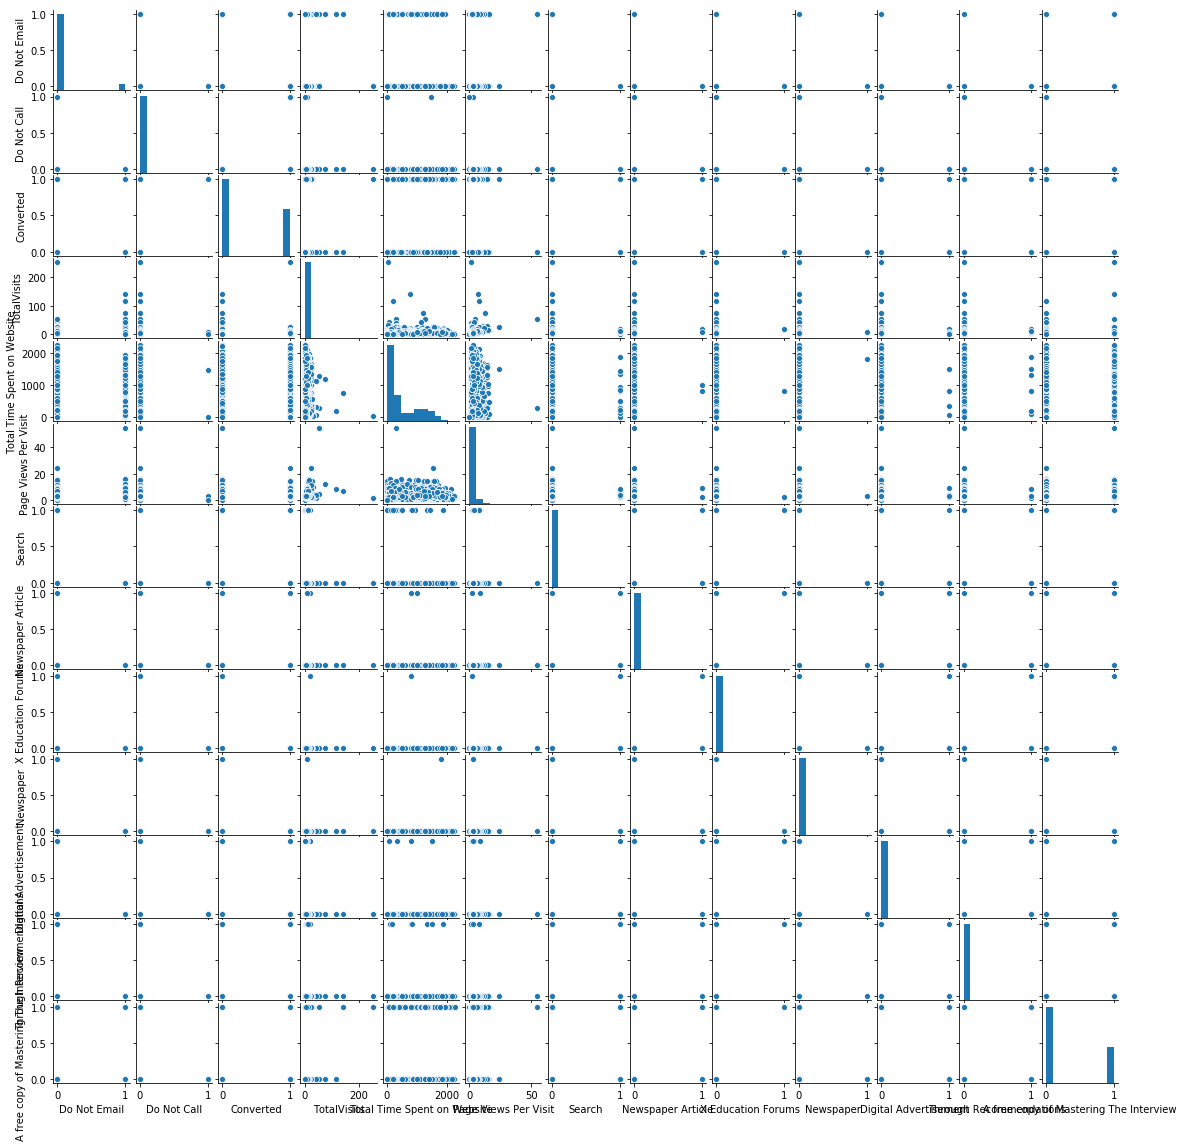

In [30]:
g=sns.pairplot(lead,height=10, aspect=0.5)
g.fig.set_size_inches(15,15)
plt.show()

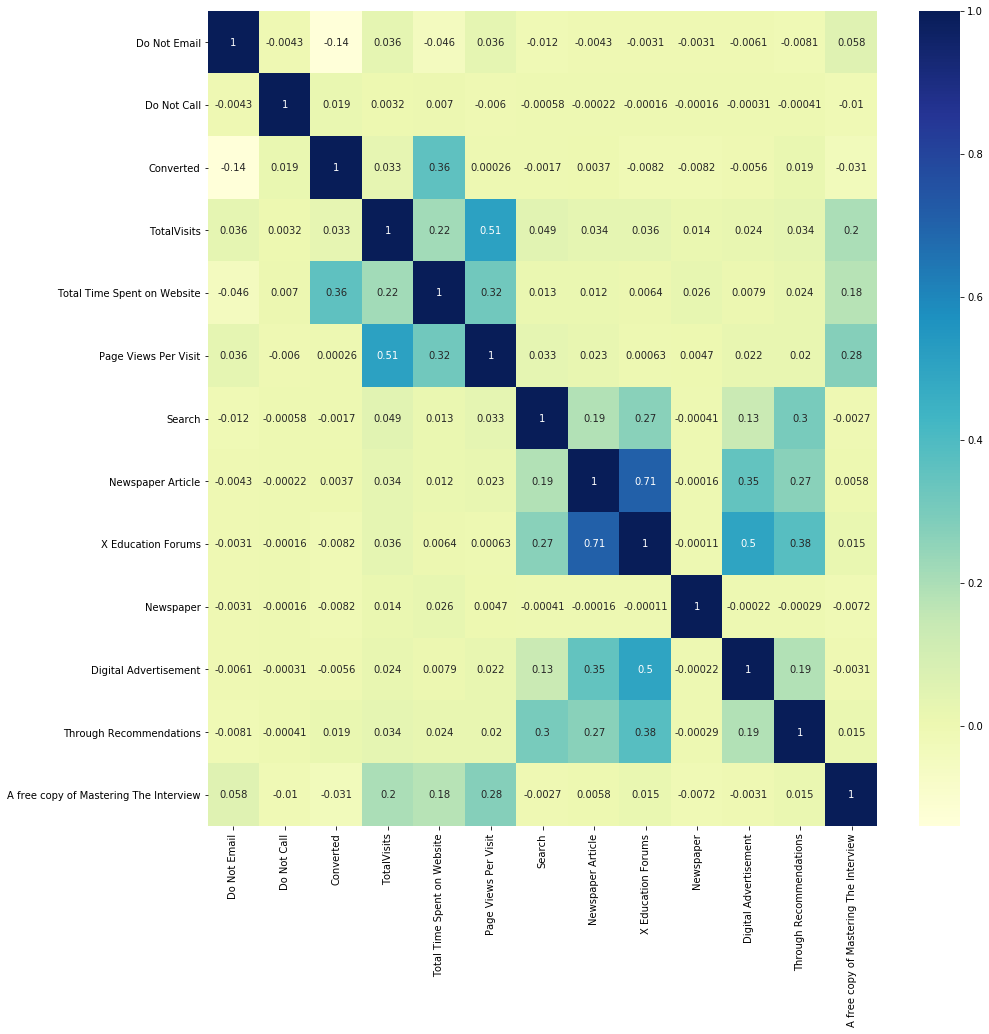

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(lead.corr(),cmap="YlGnBu" ,annot=True)

It looks like most of the attributes are not correlated to each other which expect for X Education forum and Newpaper Article. 

In [32]:
lead['Last Notable Activity'].value_counts()

modified                        3267
email opened                    2823
sms sent                        2152
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
unsubscribed                      45
unreachable                       32
had a phone conversation          14
email marked spam                  2
view in browser link clicked       1
resubscribed to emails             1
email received                     1
form submitted on website          1
approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [33]:
lead['Lead Origin'].value_counts()

landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64

In [34]:
lead['Lead Source'].value_counts()

google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
press_release           2
live chat               2
social media            2
nc_edm                  1
blog                    1
welearn                 1
testone                 1
pay per click ads       1
youtubechannel          1
welearnblog_home        1
Name: Lead Source, dtype: int64

In [35]:
lead['Last Activity'].value_counts()

email opened                    3432
sms sent                        2716
olark chat conversation          972
page visited on website          640
converted to lead                428
email bounced                    312
email link clicked               267
form submitted on website        116
unreachable                       90
unsubscribed                      59
had a phone conversation          25
view in browser link clicked       6
approached upfront                 5
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

### Outlier Detection

In [36]:
#creating a df for continuous numerical variables
lead_numeric=lead[['TotalVisits' , 'Total Time Spent on Website', 'Page Views Per Visit' ]]
lead_numeric.head(5)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0.0,0,0.0
1,5.0,674,2.5
2,2.0,1532,2.0
3,1.0,305,1.0
4,2.0,1428,1.0


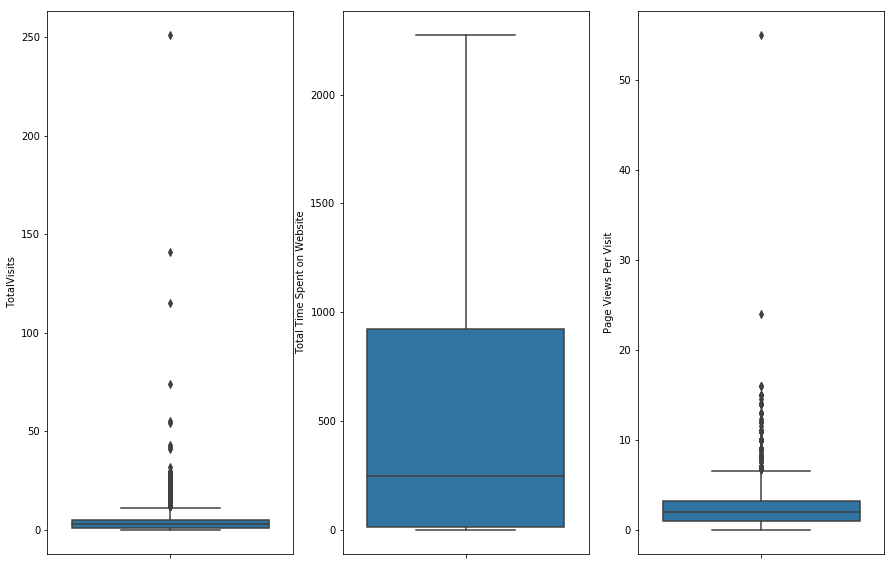

In [37]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
sns.boxplot(y=lead_numeric['TotalVisits'])
plt.subplot(1,3,2)
sns.boxplot(y=lead_numeric['Total Time Spent on Website'])
plt.subplot(1,3,3)
sns.boxplot(y=lead_numeric['Page Views Per Visit'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CA1A8A8BE0>,
      dtype=object)

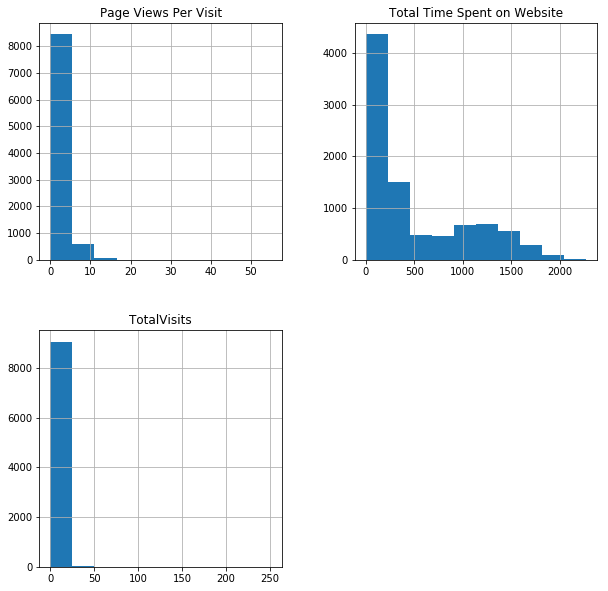

In [38]:
#visualizing the spread of data for these variables
lead_numeric[lead_numeric.columns].hist(figsize=(10,10))

In [39]:
#We can see that there are certain outliers in our data-set 
#checking outliers
lead_numeric.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


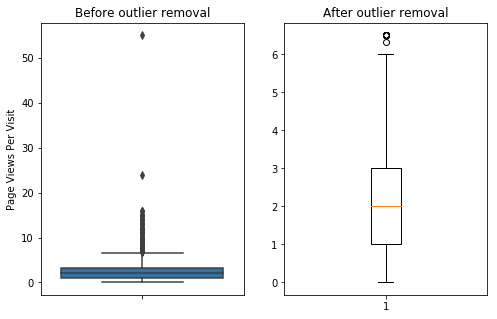

In [40]:
# outlier treatment for 'Page Views Per Visit'
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.boxplot(y=lead_numeric['Page Views Per Visit'])
plt.title('Before outlier removal')
Q1 = lead['Page Views Per Visit'].quantile(0.25)
Q3 = lead['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
lead = lead[(lead['Page Views Per Visit'] >= Q1 - 1.5*IQR)  & (lead['Page Views Per Visit'] <= Q3 + 1.5*IQR)]
plt.subplot(1,2,2)
plt.boxplot(lead['Page Views Per Visit'])
plt.title('After outlier removal')
plt.show()

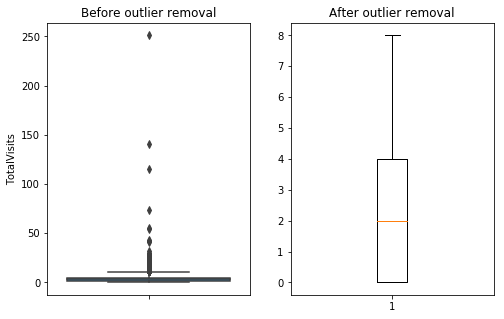

In [41]:
# outlier treatment for 'Page Views Per Visit'
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.boxplot(y=lead_numeric['TotalVisits'])
plt.title('Before outlier removal')
Q1 = lead.TotalVisits.quantile(0.25)
Q3 = lead.TotalVisits.quantile(0.75)
IQR = Q3 - Q1
lead = lead[(lead.TotalVisits >= Q1 - 1.5*IQR) & (lead.TotalVisits <= Q3 + 1.5*IQR)]
plt.subplot(1,2,2)
plt.boxplot(lead['TotalVisits'])
plt.title('After outlier removal')
plt.show()

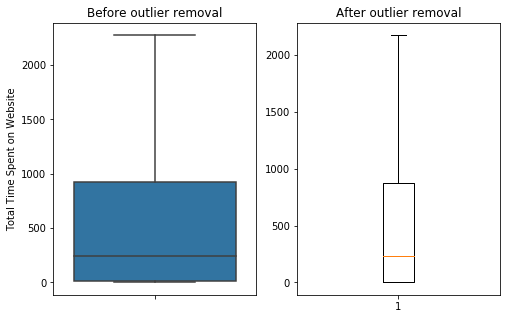

In [42]:
# outlier treatment for 'Page Views Per Visit'
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.boxplot(y=lead_numeric['Total Time Spent on Website'])
plt.title('Before outlier removal')
Q1 = lead['Total Time Spent on Website'].quantile(0.25)
Q3 = lead['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1
lead = lead[(lead['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (lead['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]
plt.subplot(1,2,2)
plt.boxplot(lead['Total Time Spent on Website'])
plt.title('After outlier removal')
plt.show()

In [43]:
lead.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.0,8231.0,8231.0,8231.000000,8231.000000,8231.000000
mean,0.077390,0.000121,0.372130,2.583526,461.366177,2.039371,0.000607,0.0,0.0,0.0,0.000243,0.000364,0.295225
std,0.267226,0.011022,0.483402,2.097048,538.266789,1.647904,0.024641,0.0,0.0,0.0,0.015587,0.019089,0.456172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,228.000000,2.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,4.000000,870.000000,3.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,8.000000,2170.000000,6.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [44]:
#dropping columns with 0 variance
lead=lead.drop(['Newspaper Article', 'X Education Forums', 'Newspaper'] , axis=1)

In [45]:
#checking percentage of records retained after outlier treatment
((lead.shape[0])/9240)*100

89.08008658008659

# Step 4: Data Preparation

### Data Scaling

In [46]:
df_scaled =lead[['TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' ]]

In [47]:
normalized_df=(df_scaled-df_scaled.mean())/df_scaled.std()
lead_df=lead.drop(['TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' ] , axis=1)
lead_df=pd.concat([lead_df,normalized_df] , axis=1)
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Last Activity,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,api,olark chat,0,0,0,page visited on website,0,0,0,0,modified,-1.231982,-0.857133,-1.237554
1,api,organic search,0,0,0,email opened,0,0,0,0,email opened,1.152322,0.395034,0.279524
2,landing page submission,direct traffic,0,0,1,email opened,0,0,0,1,email opened,-0.278261,1.989039,-0.023891
3,landing page submission,direct traffic,0,0,0,unreachable,0,0,0,0,modified,-0.755121,-0.290499,-0.630723
4,landing page submission,google,0,0,1,converted to lead,0,0,0,0,modified,-0.278261,1.795827,-0.630723


### Dummy Variable Creation

In [48]:
lead_dummies_df=pd.get_dummies(lead_df,drop_first=True)

In [49]:
lead_dummies_df['Prospect ID'] = lead_prospect_id

In [50]:
lead_dummies_df.shape

(8231, 64)

In [51]:
lead_dummies_df.head(5)

,Do Not Email,Do Not Call,Converted,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked,Prospect ID
0,0,0,0,0,0,0,0,-1.231982,-0.857133,-1.237554,...,0,1,0,0,0,0,0,0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620
1,0,0,0,0,0,0,0,1.152322,0.395034,0.279524,...,0,0,0,0,0,0,0,0,0,2a272436-5132-4136-86fa-dcc88c88f482
2,0,0,1,0,0,0,1,-0.278261,1.989039,-0.023891,...,0,0,0,0,0,0,0,0,0,8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3,0,0,0,0,0,0,0,-0.755121,-0.290499,-0.630723,...,0,1,0,0,0,0,0,0,0,0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4,0,0,1,0,0,0,0,-0.278261,1.795827,-0.630723,...,0,1,0,0,0,0,0,0,0,3256f628-e534-4826-9d63-4a8b88782852


In [52]:
lead_dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8231 entries, 0 to 9239
Data columns (total 64 columns):
Do Not Email                                          8231 non-null int64
Do Not Call                                           8231 non-null int64
Converted                                             8231 non-null int64
Search                                                8231 non-null int64
Digital Advertisement                                 8231 non-null int64
Through Recommendations                               8231 non-null int64
A free copy of Mastering The Interview                8231 non-null int64
TotalVisits                                           8231 non-null float64
Total Time Spent on Website                           8231 non-null float64
Page Views Per Visit                                  8231 non-null float64
Lead Origin_landing page submission                   8231 non-null uint8
Lead Origin_lead add form                             8231 non-null uint8

In [53]:
lead_dummies_df.describe()

,Do Not Email,Do Not Call,Converted,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
count,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8.231000e+03,8.231000e+03,8.231000e+03,...,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000
mean,0.077390,0.000121,0.372130,0.000607,0.000243,0.000364,0.295225,-1.540635e-16,-2.260102e-16,-1.488273e-15,...,0.000121,0.001093,0.371887,0.020897,0.026242,0.000121,0.238124,0.003280,0.005103,0.000121
std,0.267226,0.011022,0.483402,0.024641,0.015587,0.019089,0.456172,1.000000e+00,1.000000e+00,1.000000e+00,...,0.011022,0.033051,0.483338,0.143047,0.159865,0.011022,0.425961,0.057183,0.071255,0.011022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.231982e+00,-8.571329e-01,-1.237554e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.231982e+00,-8.571329e-01,-1.237554e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.782606e-01,-4.335511e-01,-2.389137e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,6.754611e-01,7.591660e-01,5.829402e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.582905e+00,3.174325e+00,2.403435e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
#conversion rate
(sum(lead_dummies_df.Converted)/lead_dummies_df.shape[0])*100

37.21297533714008

### Test Train Split

In [55]:
# Putting feature variable to X
x = lead_dummies_df.drop(['Converted', 'Prospect ID'],axis=1)

# Putting response variable to y
y = lead_dummies_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [56]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.7,test_size=0.3,random_state=100)

# Step 5: Perform PCA 

## Applying PCA to train data-set

In [57]:
pca = PCA(svd_solver='randomized', random_state=100)

In [58]:
#applying pca first
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [59]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.sort_values('PC1').head()

,PC1,PC2,Feature
19,-0.178814,0.013484,Lead Source_olark chat
39,-0.067058,0.003655,Last Activity_olark chat conversation
10,-0.056823,0.021798,Lead Origin_lead add form
54,-0.052432,-0.001288,Last Notable Activity_modified
23,-0.043563,0.016345,Lead Source_reference


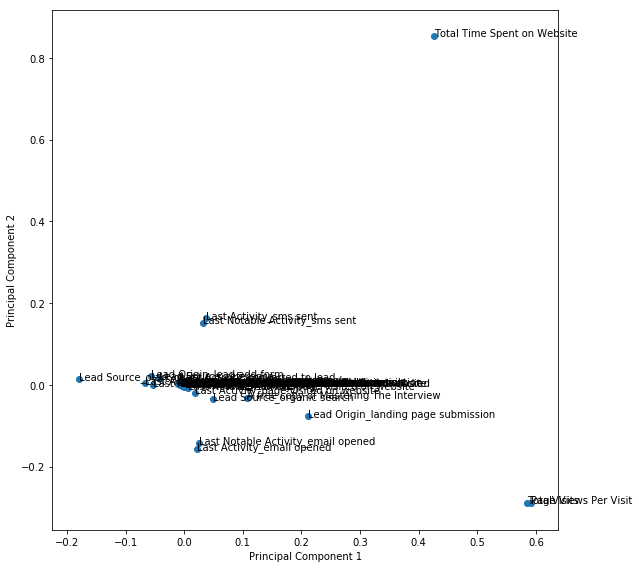

In [60]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [61]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([4.08280697e-01, 1.24737830e-01, 9.88164281e-02, 7.82934483e-02,
       6.79658973e-02, 3.51127729e-02, 3.10175590e-02, 2.54169272e-02,
       1.73829599e-02, 1.65576426e-02, 1.44540108e-02, 1.26218812e-02,
       1.11896130e-02, 1.04458850e-02, 9.05065561e-03, 6.44474032e-03,
       5.21203101e-03, 3.82326168e-03, 3.58365097e-03, 3.31705592e-03,
       2.66989909e-03, 2.38415651e-03, 2.27139616e-03, 1.94964952e-03,
       1.65660724e-03, 1.25400863e-03, 1.13676366e-03, 9.10196620e-04,
       5.02710272e-04, 3.41321126e-04, 1.40835197e-04, 1.36895643e-04,
       9.67574302e-05, 9.22781553e-05, 8.42771632e-05, 7.79661301e-05,
       7.08975811e-05, 6.23782355e-05, 5.42662240e-05, 4.90533977e-05,
       3.21268493e-05, 2.98969986e-05, 2.98899739e-05, 2.98825837e-05,
       2.98234641e-05, 2.97976797e-05, 2.97262992e-05, 2.97228046e-05,
       2.95365418e-05, 1.54188419e-05, 1.36208584e-05, 1.14070369e-05,
       9.33157667e-06, 7.10091077e-06, 4.15764390e-06, 1.29783403e-06,
      

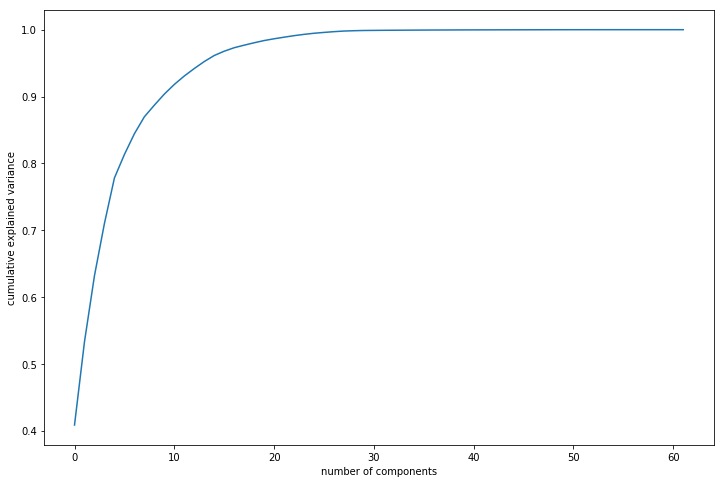

In [62]:
#Plotting the scree plot
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [63]:
#Choosing our variance cutoff to be 0.95 to let PCA select the number of components
pca_final = PCA(0.9)

In [64]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(5761, 10)

In [65]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca_final.components_[0],'PC2':pca_final.components_[1], 'Feature':colnames})
pcs_df.sort_values('PC1', ascending=False).head(10)

,PC1,PC2,Feature
8,0.592031,-0.290139,Page Views Per Visit
6,0.585699,-0.290011,TotalVisits
7,0.426015,0.852728,Total Time Spent on Website
9,0.210831,-0.076365,Lead Origin_landing page submission
16,0.109471,0.006973,Lead Source_google
5,0.107767,-0.032944,A free copy of Mastering The Interview
14,0.075325,0.000007,Lead Source_direct traffic
20,0.049860,-0.035624,Lead Source_organic search
42,0.037417,0.162850,Last Activity_sms sent
58,0.032687,0.151857,Last Notable Activity_sms sent


In [66]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

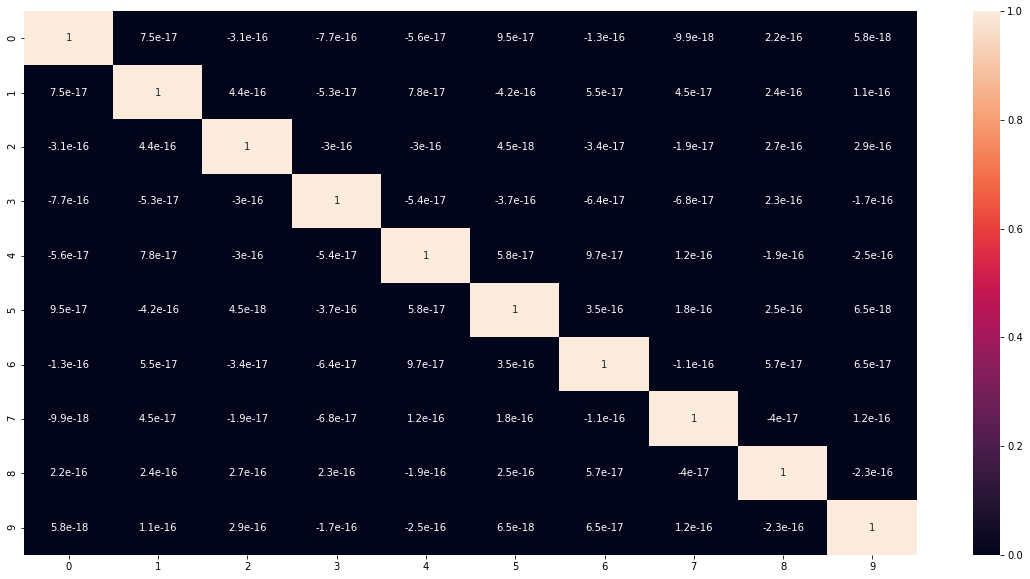

In [67]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [68]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 4.357093126118633e-16 , min corr:  -7.709060515733518e-16


## Apply PCA to Test data-set

In [69]:
#Applying selected components to the test data - 14 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2470, 10)

In [70]:
#function for performing PCA
def doPca(df, pca_f):
    return pca_f.transform(df)

In [71]:
y_test.head()

3987    0
2489    1
3400    0
5184    0
6752    0
Name: Converted, dtype: int64

# Step 6: Logistic regression on principal components

## Apply Logistic Regression to Train data-set

In [72]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [73]:
#Making prediction on the train data
pred_probs_train = model_pca.predict_proba(df_train_pca)[: , 1]

In [74]:
#making a dataframe to get the actual converted value with the predicted probablity
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':pred_probs_train})
y_train_pred_final['Prospect_IDs'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_IDs
0,0,0.583155,6358
1,0,0.230376,5658
2,0,0.063800,5086
3,0,0.350338,3738
4,0,0.253445,4711


In [75]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.7 else 0
#this is a random selection
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.7 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_IDs,predicted
0,0,0.583155,6358,0
1,0,0.230376,5658,0
2,0,0.063800,5086,0
3,0,0.350338,3738,0
4,0,0.253445,4711,0


In [76]:
# calculate the Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3400  204]
 [1267  890]]


In [77]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7446623850026037


In [78]:
#Plotting the ROC curve to check the how close the model will provide accurate results on train data-set
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

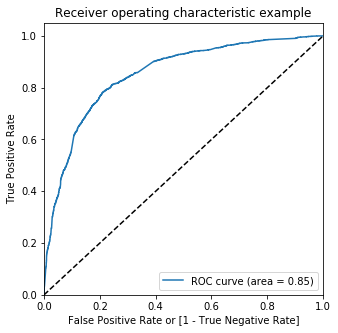

In [79]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
#this looks pretty good

## Finding Optimal Cutoff Probablity Point

In [80]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_IDs,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.583155,6358,0,1,1,1,1,1,1,0,0,0,0
1,0,0.230376,5658,0,1,1,1,0,0,0,0,0,0,0
2,0,0.063800,5086,0,1,0,0,0,0,0,0,0,0,0
3,0,0.350338,3738,0,1,1,1,1,0,0,0,0,0,0
4,0,0.253445,4711,0,1,1,1,0,0,0,0,0,0,0


In [81]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.374414  1.000000  0.000000
0.1   0.1  0.556674  0.968011  0.310488
0.2   0.2  0.698837  0.913306  0.570477
0.3   0.3  0.767922  0.817339  0.738346
0.4   0.4  0.786843  0.751043  0.808269
0.5   0.5  0.790314  0.666667  0.864317
0.6   0.6  0.766360  0.519703  0.913984
0.7   0.7  0.744662  0.412610  0.943396
0.8   0.8  0.722965  0.312935  0.968368
0.9   0.9  0.679049  0.159017  0.990289


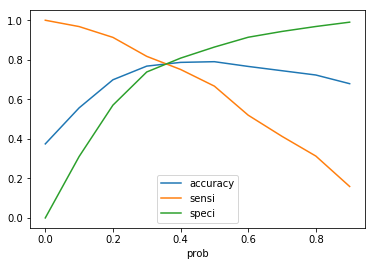

In [82]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [83]:
#Frome the above graph , we choose 0.34 as our optimal cut-off range to predict if the prospect is going to be a hot lead
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_IDs,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.583155,6358,0,1,1,1,1,1,1,0,0,0,0,1
1,0,0.230376,5658,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.063800,5086,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.350338,3738,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.253445,4711,0,1,1,1,0,0,0,0,0,0,0,0


In [84]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7844124283978476

In [85]:
y_train_pred_final=y_train_pred_final.drop(['predicted', 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8,0.9], axis=1)

In [86]:
#Assigning score to the train data-set based on probabilities
y_train_pred_final['Score']=round(y_train_pred_final['Converted_Prob']*100,2)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_IDs,0.6,0.7,final_predicted,Score
0,0,0.583155,6358,0,0,1,58.32
1,0,0.230376,5658,0,0,0,23.04
2,0,0.063800,5086,0,0,0,6.38
3,0,0.350338,3738,0,0,1,35.03
4,0,0.253445,4711,0,0,0,25.34


We choose 0.34 as our optimal cut-off range to predict if the prospect is going to be a hot lead

## Applying Model to Test data-set

In [87]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
pred_probs_test

array([0.06379996, 0.86958302, 0.15813128, ..., 0.38808132, 0.23879417,
       0.09504716])

In [88]:
#making a dataframe to get the actual converted value with the predicted probablity
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':pred_probs_test})
y_test_pred_final['Prospect_IDs'] = y_test.index
y_test_pred_final.head()

,Converted,Converted_Prob,Prospect_IDs
0,0,0.063800,3987
1,1,0.869583,2489
2,0,0.158131,3400
3,0,0.711800,5184
4,0,0.230376,6752


In [89]:
# Creating new column 'predicted' with 1 if coverted_prob > 0.34 else 0
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_test_pred_final.head()

,Converted,Converted_Prob,Prospect_IDs,final_predicted
0,0,0.063800,3987,0
1,1,0.869583,2489,1
2,0,0.158131,3400,0
3,0,0.711800,5184,1
4,0,0.230376,6752,0


In [90]:
# Let's check the overall accuracy of Prediction
print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted))

0.7809716599190284


In [91]:
#Checking the ROC Curve score
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.86'

In [92]:
#Assigning score to the train data-set based on probabilities
y_test_pred_final['Score']=round(y_test_pred_final['Converted_Prob']*100,2)
y_test_pred_final.head()

,Converted,Converted_Prob,Prospect_IDs,final_predicted,Score
0,0,0.063800,3987,0,6.38
1,1,0.869583,2489,1,86.96
2,0,0.158131,3400,0,15.81
3,0,0.711800,5184,1,71.18
4,0,0.230376,6752,0,23.04


# Step 7:  Model Evaluation and Visualization 

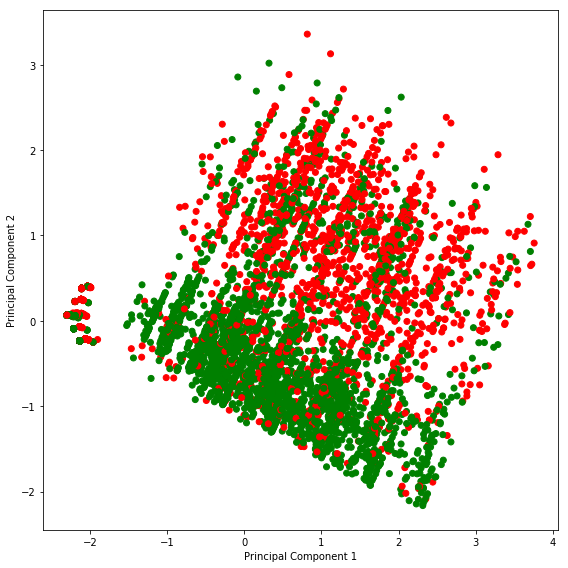

In [93]:
# 2D plot for 2 principal components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### Checking Sentivity
As CEO has given a ballpark of the target lead conversion rate to be around 80% , this means we will focus on the sensitivity of the model

In [94]:
#calculate the confusion matrix for our final test data-set with the final predicted value
confusion3 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
print("Confusion Matrix")
print(confusion3)
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = {:.2f}".format( TP / float(TP+FN)))
print("false postive rate = {:.2f}".format( FP / float(TN+FP)))

Confusion Matrix
[[1214  350]
 [ 191  715]]
Sensitivity = 0.79
false postive rate = 0.22


In [95]:
#calculate the confusion matrix for our final train data-set with the final predicted value
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print("Confusion Matrix")
print(confusion3)
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = {:.2f}".format( TP / float(TP+FN)))
print("false postive rate = {:.2f}".format( FP / float(TN+FP)))

Confusion Matrix
[[2817  787]
 [ 455 1702]]
Sensitivity = 0.79
false postive rate = 0.22


# Pickeling the model 

In [96]:
import pickle
with open('leadScore.model', 'wb') as f:
    pickle.dump(model_pca, f)
    
import pickle
with open('leadScore.pca', 'wb') as f:
    pickle.dump(pca_final, f)

# Prediction engine

In [97]:
class Prediction:
    def __init__(self, df, model="leadScore.model", pca="leadScore.pca", interns=False, lowPhoneCalls=False):
        self.interns = interns
        self.lowPhoneCalls = lowPhoneCalls
        if self.interns and self.lowPhoneCalls:
            raise ValueError("both flags 'interns' and 'lowPhoneCalls' cannot be set as true at same time")
        self.df = df
        self.model = self.unPickleModel(model)
        self.pca = self.unPicklePca(pca)
        self.Prediction = self.pridictor()
    def unPickleModel(self, model_location):
        with open(model_location, 'rb') as f:
            model = pickle.load(f)
        return model
    
    def unPicklePca(self, pca_location):
        with open(pca_location, 'rb') as f:
            pca = pickle.load(f)
        return pca
    
     #function for removing redundant variables   
    def _drop_redundant_columns(self, df):
        columsToDrop = ['Lead Number',
                        'Specialization', 
                        'How did you hear about X Education', 
                        'Tags', 
                        'Lead Quality',
                        'Lead Profile', 
                        'City', 
                        'Asymmetrique Activity Index', 
                        'Asymmetrique Profile Index', 
                        'Asymmetrique Activity Score',
                        'Asymmetrique Profile Score',
                        'What is your current occupation', 
                        'Lead Profile', 
                        'City',
                        'What matters most to you in choosing a course', 
                        'Country'
                       ]
        
        return df.drop(columsToDrop, axis=1)
    
    def _conv(self, x):
        if(x=='Select' or x=='select' or x=='SELECT' or x == 'Select Specialization'):
            x = np.NaN
        return x
    
    def _drop_na_rows(self, df):
        columns = ['Last Activity','TotalVisits', 'Lead Source','Page Views Per Visit' ]
        return df.dropna(subset=columns)
    
    def _convert_to_lower_string(self, df):
        df[df.select_dtypes(include='object').columns] =\
        df[df.select_dtypes(include='object').columns].apply(lambda x: x.astype(str).str.lower())
        return df
    
    def _correct_select_issue(self, df):
        categorical_Lead = df.select_dtypes(include='object')
        categorical_Lead = categorical_Lead.applymap(self._conv)
        df[categorical_Lead.columns] = categorical_Lead
        return df
    
    def _yesNoBinaryConv(self, df):
        df['Do Not Email'] = df['Do Not Email'].map({'yes':1,'no':0})
        df['Do Not Call'] = df['Do Not Call'].map({'yes':1,'no':0})
        df['Search'] = df['Search'].map({'yes':1,'no':0})
        df['Magazine'] = df['Magazine'].map({'yes':1,'no':0})
        df['Newspaper Article'] = df['Newspaper Article'].map({'yes':1,'no':0})
        df['X Education Forums'] = df['X Education Forums'].map({'yes':1,'no':0})
        df['Digital Advertisement'] = df['Digital Advertisement'].map({'yes':1,'no':0})
        df['Through Recommendations'] = df['Through Recommendations'].map({'yes':1,'no':0})
        df['Receive More Updates About Our Courses'] = df['Receive More Updates About Our Courses'].map({'yes':1,'no':0})
        df['Newspaper'] = df['Newspaper'].map({'yes':1,'no':0})
        df['Update me on Supply Chain Content'] = df['Update me on Supply Chain Content'].map({'yes':1,'no':0})
        df['Get updates on DM Content'] = df['Get updates on DM Content'].map({'yes':1,'no':0})
        df['I agree to pay the amount through cheque'] = df['I agree to pay the amount through cheque'].map({'yes':1,'no':0})
        df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map({'yes':1,'no':0})
        return df
    
    def _zeroVarianceDrop(self, df):
        columns = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                   'Get updates on DM Content', 'I agree to pay the amount through cheque']
        return df.drop(columns, 1)
    def _dropZeroVariance(self, df):
        columns = ['Newspaper Article', 'X Education Forums', 'Newspaper']
        return df.drop(columns, 1)
    def _dataScaleing(self, df):
        scaleColumn = ['TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' ]
        df_s = df[scaleColumn]
        n_df = (df_s-df_s.mean())/df_s.std()
        df_drop = df.drop(scaleColumn,1)
        return pd.concat([df_drop,n_df] , axis=1)
    
    def _create_dummies(self, df):
        return  pd.get_dummies(df ,drop_first=True)
    
    def _doPca(self, df):
        return self.pca.transform(df)
    
        
    def pridictor(self):
        df = self._correct_select_issue(self.df)
        df = self._drop_redundant_columns(df)
        df = self._drop_na_rows(df)
        df = self._convert_to_lower_string(df)
        df = self._yesNoBinaryConv(df)
        df = self._zeroVarianceDrop(df)
        df = self._dropZeroVariance(df)
        df_ids = df['Prospect ID']
        df = df.drop(['Prospect ID'], 1)
        df = self._dataScaleing(df)
        df = self._create_dummies(df)
        Prediction = pd.DataFrame({'probablility':self.model.predict_proba(self._doPca(df))[:,1]})
        Prediction['score'] = round(Prediction['probablility']*100,2)
        Prediction['Prospect ID'] = df_ids
        Prediction['pridictedConversion'] = Prediction.probablility.map( lambda x: 1 if x > 0.35 else 0)
        if self.interns:
            Prediction['pridictedConversion'] = Prediction.probablility.map( lambda x: "INTERN" if x <= 0.35 and x > 0.25 else 1 if x > 0.35 else 0)
        if self.lowPhoneCalls:
            Prediction['pridictedConversion'] = Prediction.probablility.map( lambda x: 1 if x > 0.53 else 0)
        return Prediction